<a href="https://colab.research.google.com/github/Liaukx/My-learn/blob/main/naiveB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 高斯朴素贝叶斯分类器

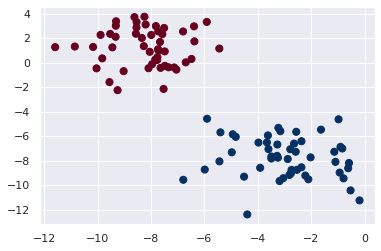

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#下面是一个基于matplotlib的绘图库
import seaborn as sns;sns.set()
#从sklearn.datasets中导入生成符合高斯分布的点的模型
from sklearn.datasets import make_blobs
#make_blobs(样本数，特征数，有几个簇中心，标准差---)
#X是返回的矩阵，y是生成的样本数
X,y = make_blobs(100,2,centers = 2,cluster_std =1.5)
#scatter绘制散点图 c是样本数，s是点的大小(x,y,count,size,style)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu');

In [ ]:
#从朴素贝叶斯模型中导入高斯贝叶斯模型
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y);

* 下面我们生成一些新的数据来，用刚才训练的模型做预测


In [ ]:
#参数是一个种子，保证生成的数据一致
rng = np.random.RandomState(0)
Xnew = [-6,-14]+[14,18] * rng.rand(2000,2)
ynew = model.predict(Xnew)

(-12.155866069826706,
 0.3820962577555922,
 -13.203386194654765,
 4.55540894924339)

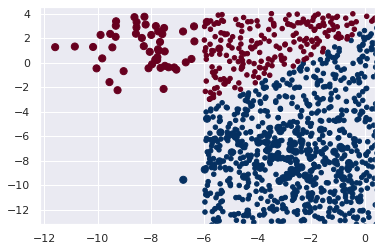

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="RdBu")
#下面是记录下第一个图的轴，让两次点公用坐标轴
lim = plt.axis()
plt.scatter(Xnew[:,0],Xnew[:,1],c=ynew,s=20,cmap='RdBu')
plt.axis(lim)

* 我们发现分界线微微弯曲，实际上高斯朴素贝叶斯分类器的边界是二次的

In [ ]:
# 输出概率
yprob = model.predict_proba(Xnew)
yprob[-5:].round(2) # round是几位小数的意思


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

输出结果的每一个元素都是一个二元数组，每一个元素的第一维表示为标签1的后验概率，第二维表示为标签2的后验概率

# 评价
高斯朴素分类器最终的分类十分依赖于高斯分布的假设，数据分布不符合高斯分布的时候不适用
多数情况下，特征数量很大时，高斯分布或许有用

# 多项式朴素贝叶斯分类器——适用于
表示计数 或者 计数率

In [ ]:
# 文本分类器
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
#为了方便只选取几个类别进行训练
categories = ['talk.religion.misc','soc.religion.christian','sci.space','comp.graphics']
train = fetch_20newsgroups(subset='train',categories=categories)
test = fetch_20newsgroups(subset='test',categories=categories)


In [ ]:
print(train.data[2])

From: mccall@mksol.dseg.ti.com (fred j mccall 575-3539)
Subject: Re: nuclear waste
Organization: Texas Instruments Inc
Lines: 34

In <1psg95$ree@access.digex.net> prb@access.digex.com (Pat) writes:

[On the issue of 'burning' nuclear wastes using particle beams...]

>How is it ever going to be an Off- the Shelf Technology if someone doesn't
>do it?  Maybe we should do this as part of the SSF design goals. ;-)

>Gee fred.  After your bitter defense of 20 KHz power as a Basic technology
>for SSF, Id think you would support a minor research program like
>this.

I sometimes wonder if your newsfeed gives you different articles than
everyone else, Pat.  Just a *few* corrections:

1) I never 'defended' 20kHz power, other than as something reasonable
to GO LOOK AT.

2) I have also never opposed a *research project* into feasibility of
the spalling reactor approach to 'cleaning' nuclear waste -- I simply
doubt it could be made to work in the Real World (tm), which ought to
become clear fairly q

In [ ]:
# 把字符串转化成向量
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
# 把像改良连接到多项式朴素贝叶斯管道分类器
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(),MultinomialNB())


In [ ]:
model.fit(train.data,train.target)
labels = model.predict(test.data)

* 绘制混淆矩阵


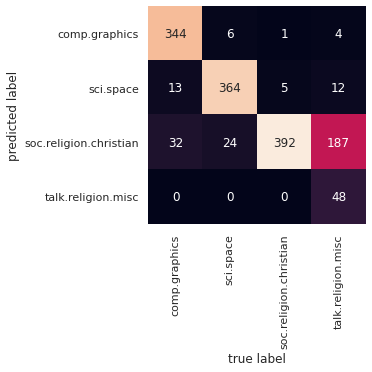

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

# 伯努利贝叶斯分类器——适用于二项分布的数据集

[https://www.cntofu.com/book/170/docs/10.md](https://)

# 下面我们做一个例子

## 使用威斯康星乳腺肿瘤数据集 预测肿瘤是良性还是恶行
* 导入数据


In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
#通过keys观察数据集是怎么分类的
print(cancer.keys())
#看一下特征和标签
print(cancer.feature_names)
print(cancer.target_names)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


* 对要建模的数据进行处理


In [ ]:
from sklearn import model_selection as slec
X,y = cancer.data,cancer.target
# random_state如果为int是随机数生成的种子
X_train,X_test,y_train,y_test = slec.train_test_split(X,y,random_state = 1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


* 使用高斯朴素贝叶斯分类器进行建模

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

* 用测试集测试

In [ ]:
print("训练集得分：{:.3f}".format(model.score(X_train,y_train)))
print("测试集得分：{:.3f}".format(model.score(X_test,y_test)))

训练集得分：0.941
测试集得分：0.944


## 绘制学习曲线

In [ ]:
from sklearn.model_selection import learning_curve
#导入随机拆分工具
from sklearn.model_selection import ShuffleSplit

* 定义绘制学习曲线的函数

In [ ]:
def plot_learning_curve(estimator,title,X,y,ylim = None,cv=None,
            n_jobs = 1, train_sizes=np.linspace(.1,1.0,5)):
  plt.figure()
  plt.title(title)
  if ylim is not None:
    plt.ylim(*ylim)
  plt.xlabel("Training Examples")
  plt.ylabel("Score")

  train_sizes, train_scores, test_scores = learning_curve(
      estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes = train_sizes)
  train_score_mean = np.mean(train_scores,axis=1)
  test_score_mean = np.mean(test_scores,axis = 1)
  plt.grid()

  plt.plot(train_sizes,train_score_mean,'o-',color = 'r',label = 'training score')
  plt.plot(train_sizes,test_score_mean,'o-',color= 'g',label = 'cross validation score')

  plt.legend(loc = 'lower right')
  return plt

* 画图

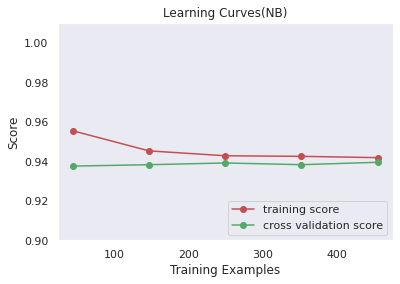

In [ ]:
title = 'Learning Curves(NB)'
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator,title,X,y,ylim = (0.9,1.01),cv = cv,n_jobs = 4)
plt.show()

通过观察学习曲线发现：高斯朴素贝叶斯分类器对样本的数量没有那么苛刻